In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv("../data/train.csv")

In [6]:
# Count missing values and calculate percentage
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
print(pd.concat([missing_data, missing_percent], axis=1, keys=['Total', 'Percent']))

                           Total  Percent
RhythmScore                    0      0.0
AudioLoudness                  0      0.0
VocalContent                   0      0.0
AcousticQuality                0      0.0
InstrumentalScore              0      0.0
LivePerformanceLikelihood      0      0.0
MoodScore                      0      0.0
TrackDurationMs                0      0.0
Energy                         0      0.0
BeatsPerMinute                 0      0.0


In [7]:
print(f"Duplicate rows found: {df.duplicated().sum()}")
# df.drop_duplicates(inplace=True) # Optional: Remove them

Duplicate rows found: 0


In [8]:
print(df.dtypes)
# Convert if necessary: df['date_column'] = pd.to_datetime(df['date_column'])

RhythmScore                  float64
AudioLoudness                float64
VocalContent                 float64
AcousticQuality              float64
InstrumentalScore            float64
LivePerformanceLikelihood    float64
MoodScore                    float64
TrackDurationMs              float64
Energy                       float64
BeatsPerMinute               float64
dtype: object


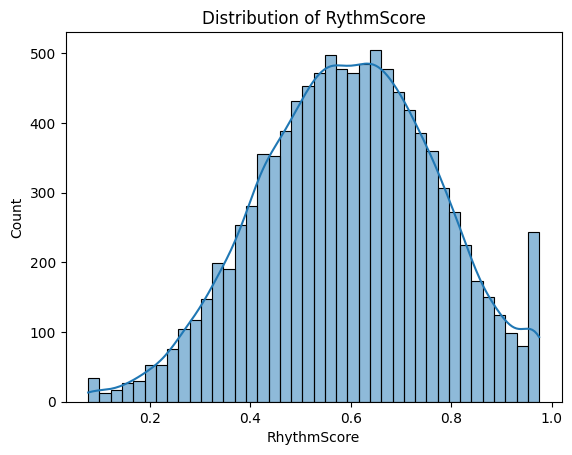

In [9]:
# Plotting a histogram with a Kernel Density Estimate (KDE)
sns.histplot(df['RhythmScore'], kde=True)
plt.title('Distribution of RythmScore')
plt.show()

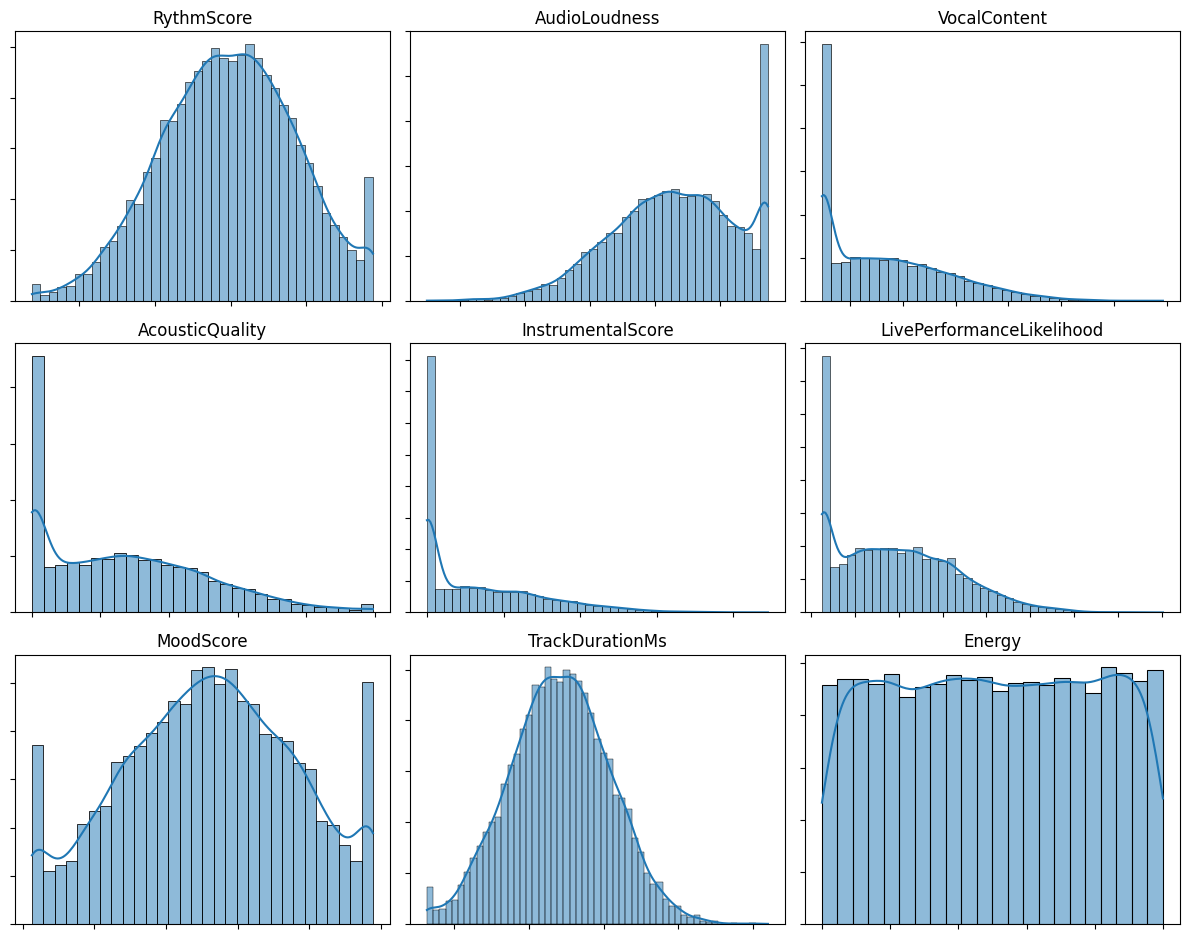

In [26]:


# Dictionary mapping column names to display titles
columns_dict = {
    'RhythmScore': 'RythmScore',
    'AudioLoudness': 'AudioLoudness',
    'VocalContent': 'VocalContent',
    'AcousticQuality': 'AcousticQuality',
    'InstrumentalScore': 'InstrumentalScore',
    'LivePerformanceLikelihood': 'LivePerformanceLikelihood',
    'MoodScore': 'MoodScore',
    'TrackDurationMs': 'TrackDurationMs',
    'Energy': 'Energy'
}

# Setup figure
n_cols = 3
n_rows = len(columns_dict) // n_cols + (len(columns_dict) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

# Flatten axes array
axes_flat = axes.flatten()

for idx, (col_name, title) in enumerate(columns_dict.items()):
    ax = axes_flat[idx]
    sns.histplot(df[col_name], kde=True, ax=ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)

# Hide any unused subplots
for idx in range(len(columns_dict), len(axes_flat)):
    axes_flat[idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout with top padding
plt.show()

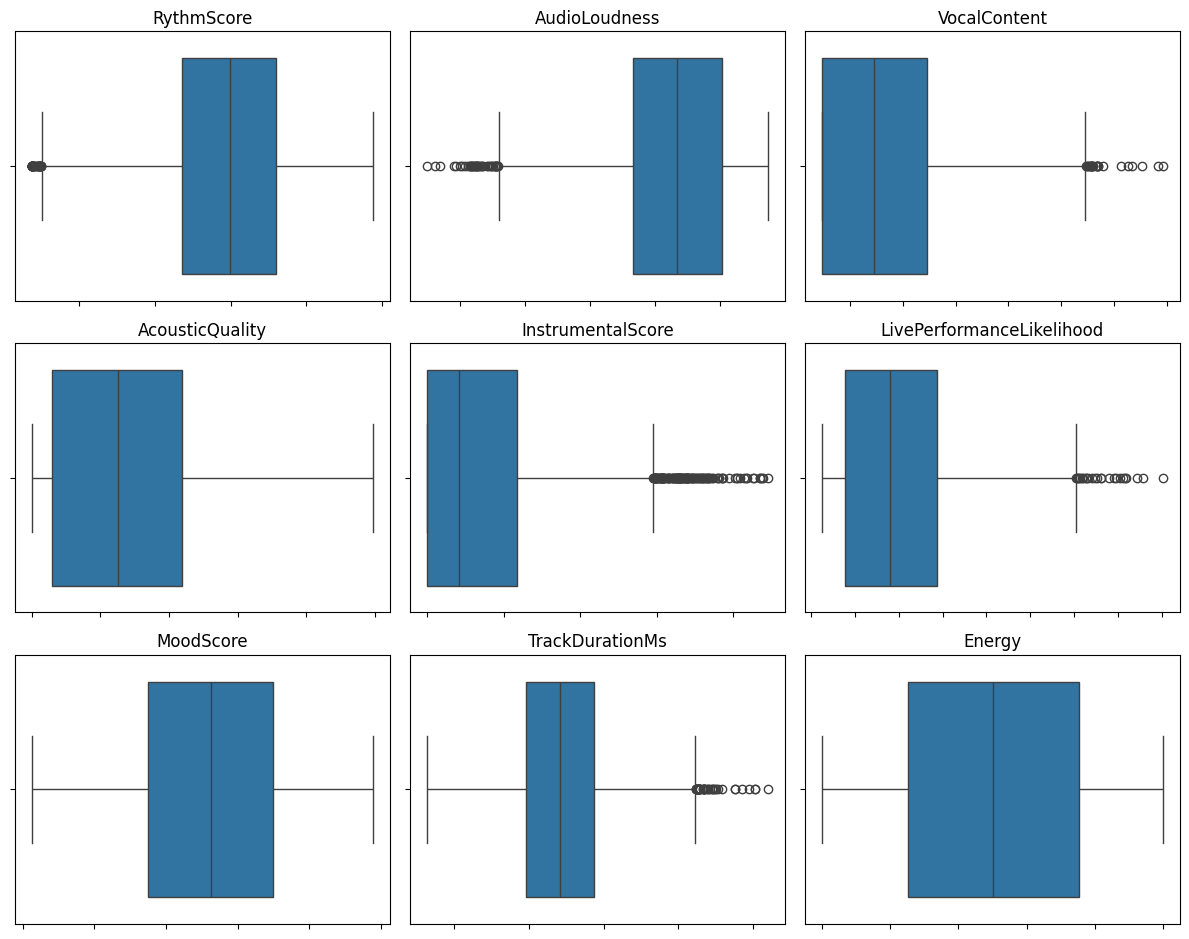

In [29]:

# Dictionary mapping column names to display titles
columns_dict = {
    'RhythmScore': 'RythmScore',
    'AudioLoudness': 'AudioLoudness',
    'VocalContent': 'VocalContent',
    'AcousticQuality': 'AcousticQuality',
    'InstrumentalScore': 'InstrumentalScore',
    'LivePerformanceLikelihood': 'LivePerformanceLikelihood',
    'MoodScore': 'MoodScore',
    'TrackDurationMs': 'TrackDurationMs',
    'Energy': 'Energy'
}

# Setup figure
n_cols = 3
n_rows = len(columns_dict) // n_cols + (len(columns_dict) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

# Flatten axes array
axes_flat = axes.flatten()

for idx, (col_name, title) in enumerate(columns_dict.items()):
    ax = axes_flat[idx]
    sns.boxplot(x=df[col_name], ax=ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)

# Hide any unused subplots
for idx in range(len(columns_dict), len(axes_flat)):
    axes_flat[idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout with top padding
plt.show()

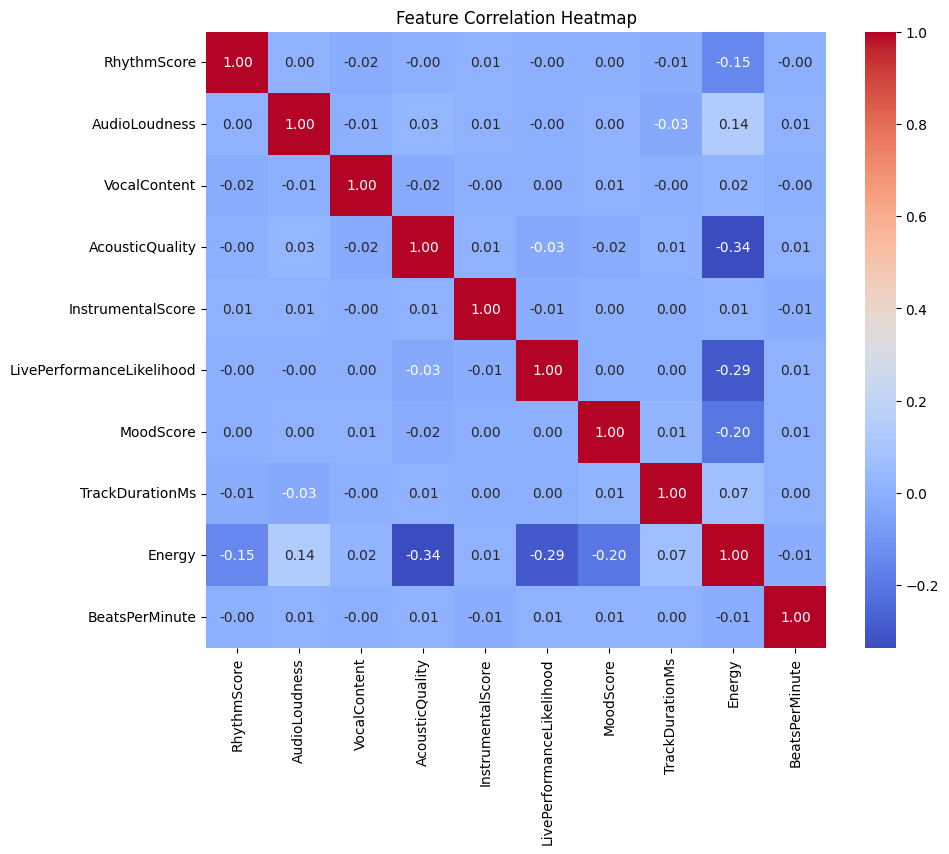

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
# Find columns with only one unique value
single_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
print(f"Columns to drop: {single_value_cols}")

Columns to drop: []


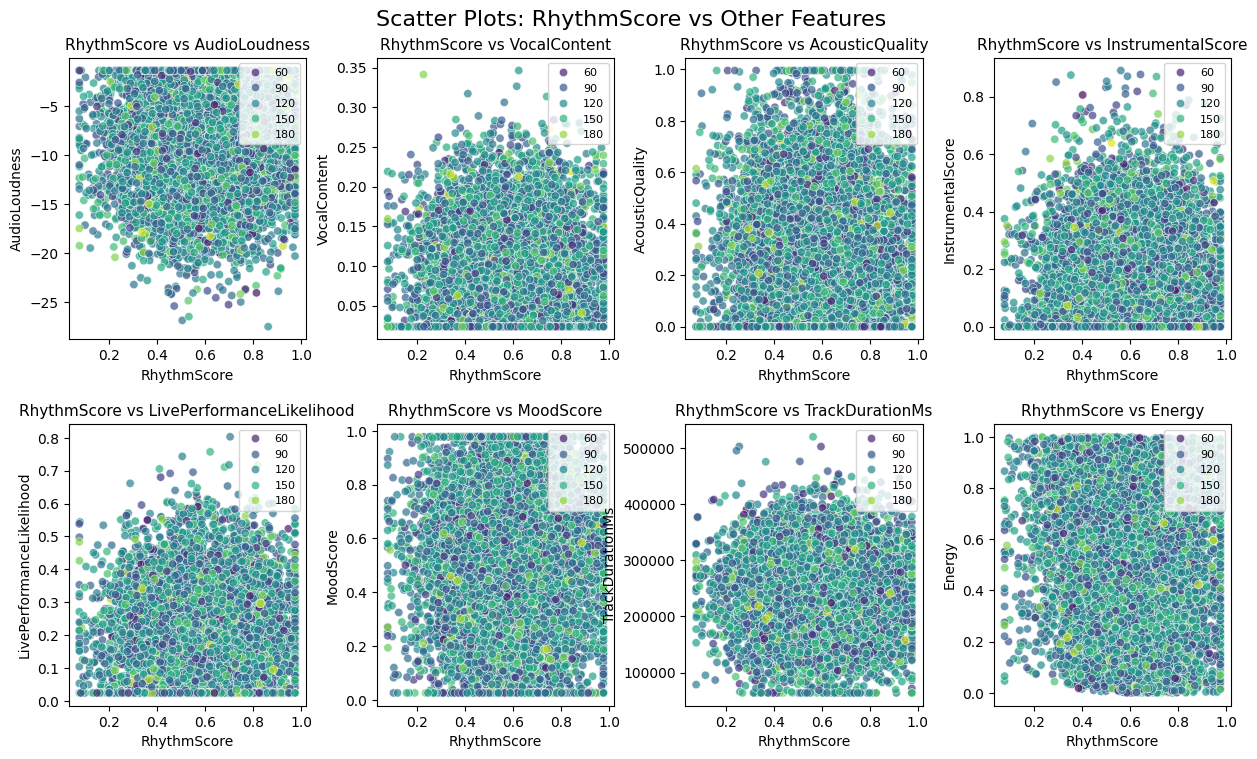

In [34]:

# Define the fixed feature and target column
fixed_feature = 'RhythmScore'  # Change this to your desired fixed feature
target_column = 'BeatsPerMinute'  # Change to your actual target column name

# List of features to plot against the fixed feature
features_to_plot = ['AudioLoudness', 'VocalContent', 'AcousticQuality',
                    'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
                    'TrackDurationMs', 'Energy']

# Create 3x3 grid
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

for i, feature in enumerate(features_to_plot):
    if i < len(axes):  # Safety check
        ax = axes[i]
        sns.scatterplot(x=fixed_feature, y=feature, hue=target_column, 
                       data=df, ax=ax, alpha=0.7, palette='viridis')
        ax.set_title(f'{fixed_feature} vs {feature}', fontsize=11)
        ax.legend(loc='upper right', fontsize=8)

# Hide any unused subplots
for i in range(len(features_to_plot), len(axes)):
    axes[i].axis('off')

plt.suptitle(f'Scatter Plots: {fixed_feature} vs Other Features', fontsize=16, y=0.98)
plt.show()

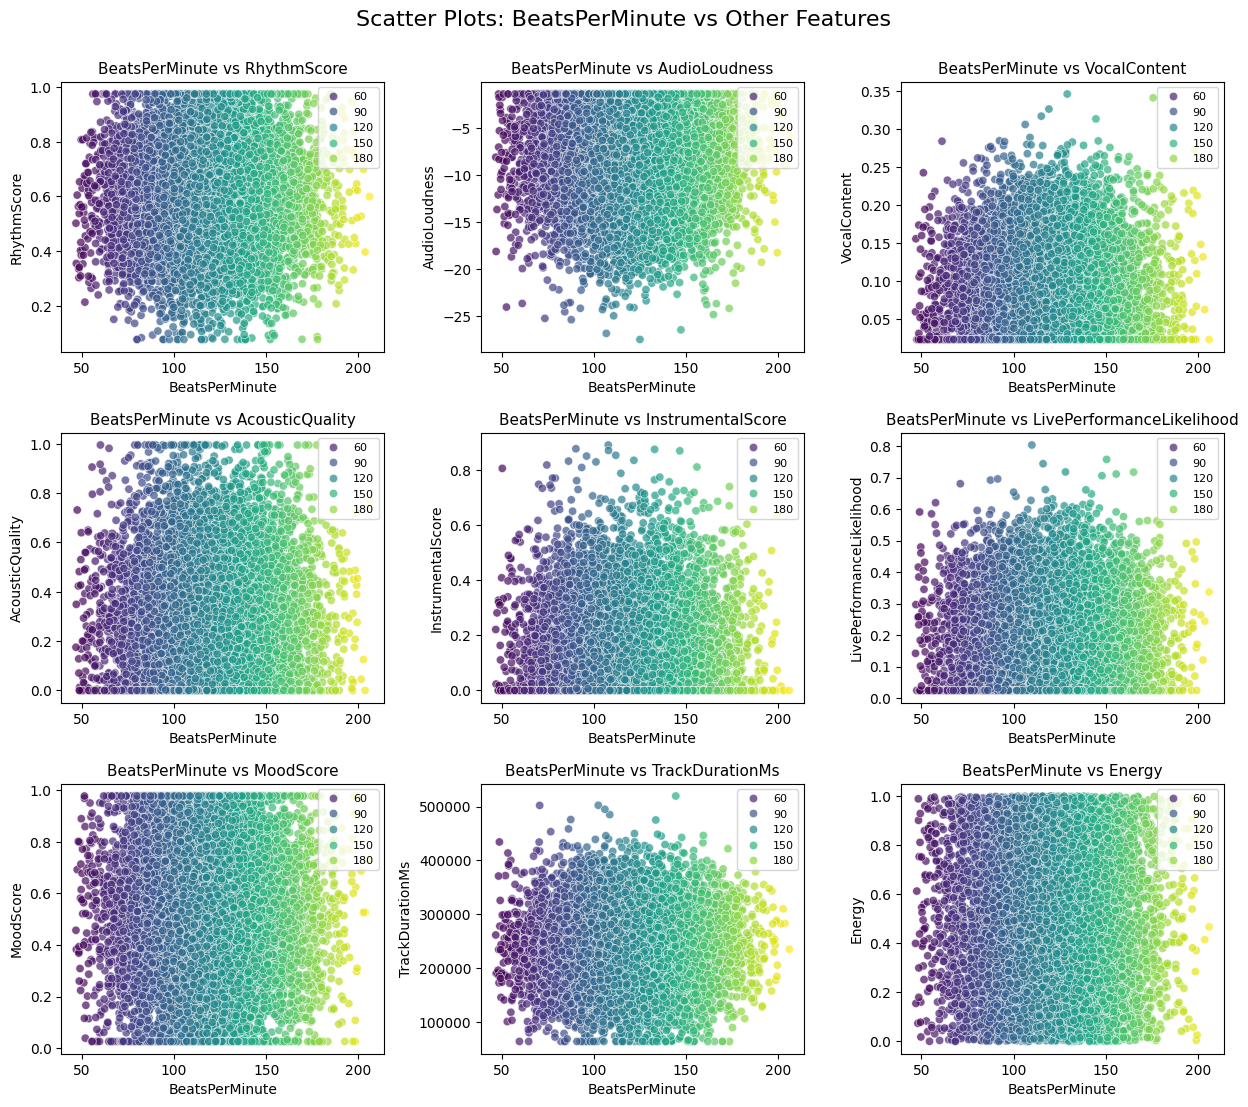

In [36]:

# Define the fixed feature and target column
fixed_feature = 'BeatsPerMinute'  # Change this to your desired fixed feature
#target_column = 'BeatsPerMinute'  # Change to your actual target column name

# List of features to plot against the fixed feature
features_to_plot = ['RhythmScore','AudioLoudness', 'VocalContent', 'AcousticQuality',
                    'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
                    'TrackDurationMs', 'Energy']

# Create 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

for i, feature in enumerate(features_to_plot):
    if i < len(axes):  # Safety check
        ax = axes[i]
        sns.scatterplot(x=fixed_feature, y=feature, hue=target_column, 
                       data=df, ax=ax, alpha=0.7, palette='viridis')
        ax.set_title(f'{fixed_feature} vs {feature}', fontsize=11)
        ax.legend(loc='upper right', fontsize=8)

# Hide any unused subplots
for i in range(len(features_to_plot), len(axes)):
    axes[i].axis('off')

plt.suptitle(f'Scatter Plots: {fixed_feature} vs Other Features', fontsize=16, y=0.98)
plt.show()

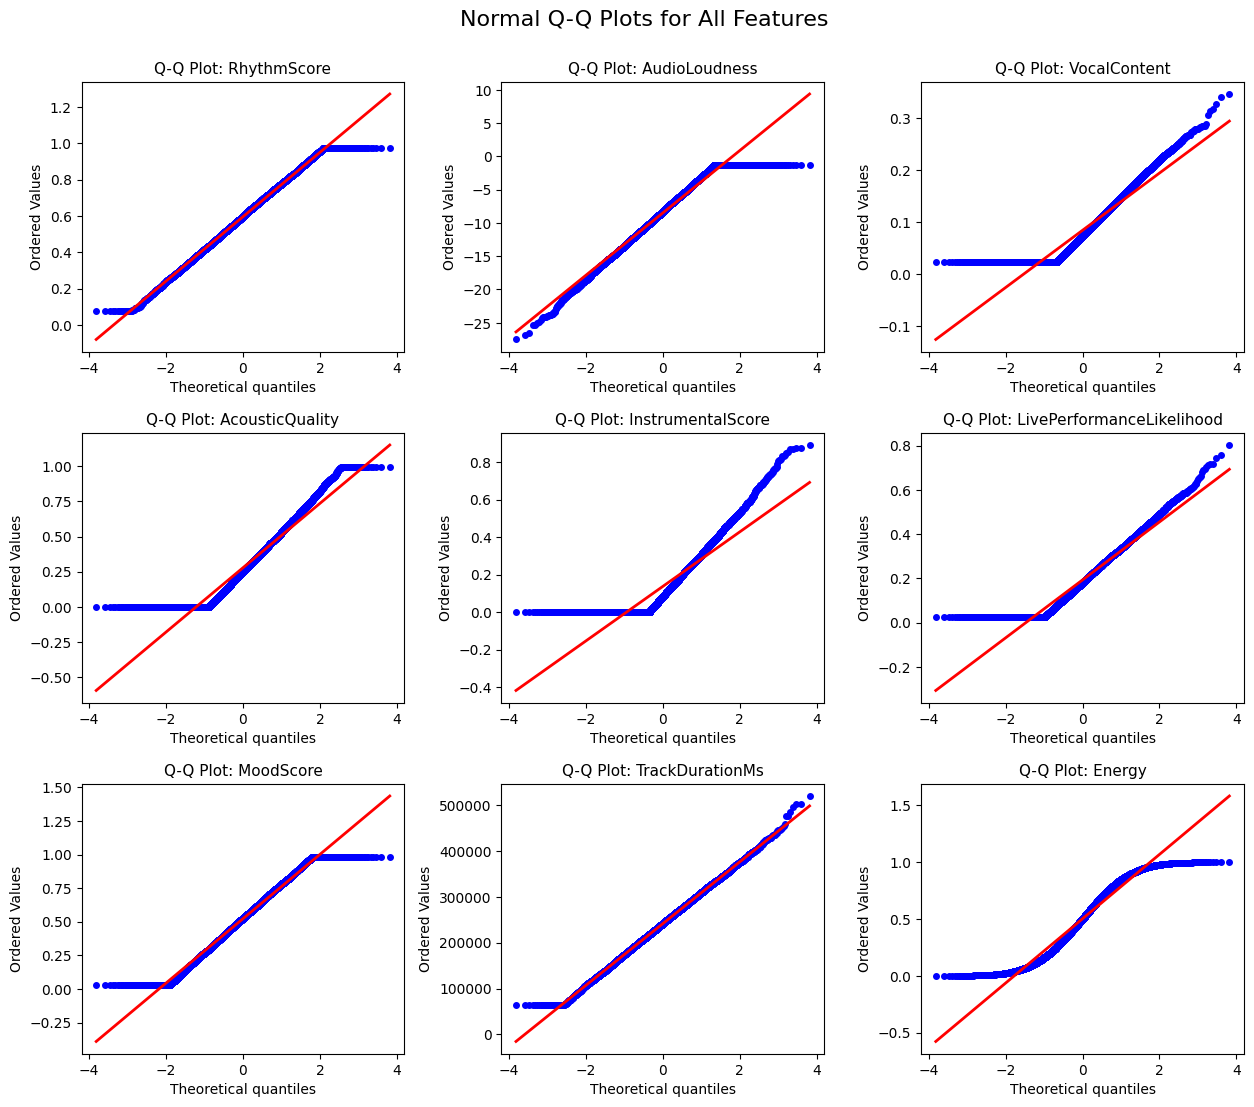

In [39]:

# List of features to analyze
features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 
            'AcousticQuality', 'InstrumentalScore', 'LivePerformanceLikelihood',
            'MoodScore', 'TrackDurationMs', 'Energy']

# Create 3x3 grid for Q-Q plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

for i, feature in enumerate(features):
    if i < len(axes):
        ax = axes[i]
        stats.probplot(df[feature], dist="norm", plot=ax)
        ax.set_title(f'Q-Q Plot: {feature}', fontsize=11)
        # Customize line appearance
        ax.get_lines()[0].set_markerfacecolor('blue')
        ax.get_lines()[0].set_markeredgecolor('blue')
        ax.get_lines()[0].set_markersize(4)
        ax.get_lines()[1].set_color('red')
        ax.get_lines()[1].set_linewidth(2)

# Hide any unused subplots
for i in range(len(features), len(axes)):
    axes[i].axis('off')

plt.suptitle('Normal Q-Q Plots for All Features', fontsize=16, y=0.98)
plt.show()